In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
data = pd.read_csv("1000_Companies.csv")
data.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
X = data.drop(columns='Profit')
X
y = data['Profit']
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

<Axes: >

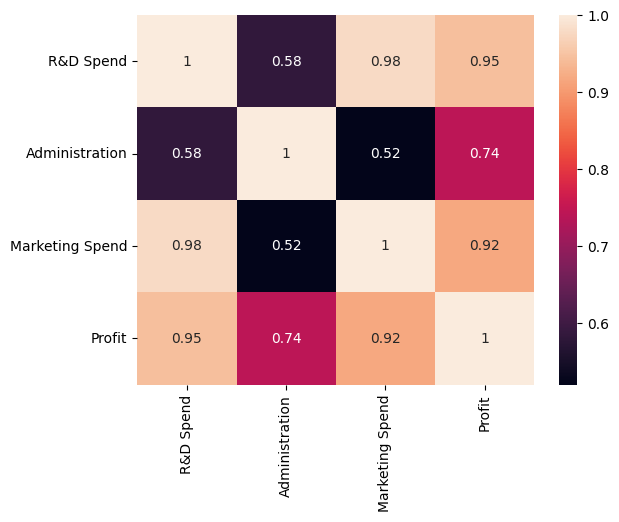

In [22]:
sns.heatmap(data.select_dtypes(include="number").corr(),annot = True)

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop = "first"),["State"])    
    ],
    remainder= "passthrough"
)

In [43]:
X_encoded = col_trans.fit_transform(X)
X_encoded

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0027547e+05, 2.4192631e+05,
        2.2714282e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2845623e+05, 3.2165214e+05,
        2.8169232e+05],
       [0.0000000e+00, 1.0000000e+00, 1.6118172e+05, 2.7093986e+05,
        2.9544217e+05]], shape=(1000, 5))

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred


from sklearn.linear_model import r 

array([124953.7996469 , 111734.4950316 ,  90901.26364246, 127455.94292207,
       161129.99124217,  90972.77173954, 154891.79921465, 139296.99831535,
        88028.04031292,  90667.78522922, 167567.44512269, 162870.30933751,
       104468.85237494, 108151.33521543,  91156.28051896, 159354.34982184,
       116792.61755437, 104673.06302735, 120511.90141856, 105579.62753158,
        75617.72527019, 125867.25652506,  64489.78255518,  70121.93853858,
       170731.05792007, 164029.94702986, 178604.70505217, 135581.8016896 ,
       121706.61701266, 162688.7689977 , 145511.31239214, 113471.14631659,
       165275.7391364 , 141803.22871506,  64513.04425429,  88933.74337007,
        82148.86670558,  74213.40921359, 116876.82828018, 170635.42667681,
        59635.84593443,  88218.41683725, 120923.47393602, 142173.47183749,
       168989.01681667, 146927.44477359, 152810.08926217, 138823.79020677,
       142008.0554969 ,  74584.51377479, 114481.09611289,  61817.27425639,
       171089.43534572, 1

In [30]:
model.coef_

array([-8.74491486e+02, -9.71337988e+01,  5.33045605e-01,  1.13893831e+00,
        8.30755037e-02])

In [31]:
model.intercept_

np.float64(-82439.15560710755)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_pred,y_test)

0.98370149748051

In [35]:
mean_squared_error(y_pred,y_test)

30775142.856780514

## polynomial regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model.fit(X_train_poly,y_train)
y_pred = model.predict(X_test_poly)


R = r2_score(y_pred,y_test)
R
mm = mean_squared_error(y_pred,y_test)
